# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import normaltest

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Funções

In [2]:
def normal_test(list, feature, array, alpha=0.05):
    p = normaltest(array).pvalue
    list.append({
        'feature': feature,
        'p_valor': p
    })
    if p < alpha:
        string = f'Rejeita H0, A feature {feature} NÃO ESTÁ normalmente distribuída'
        resultado = None
    elif p >= alpha:
        string = f'Aceita H0, A feature {feature} ESTÁ normalmente distribuída'
        resultado = 'Normal'
    else:
        string = f'Erro feature {feature}'
        resultado = None
    return string, resultado

# Lendo os Dados

In [3]:
train_label = pd.read_csv('../data/train_labels.csv')
train_label

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [4]:
df = pd.read_csv('../data/train_data.csv')
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979332,0.416013,0.020818,0.828199,0.003487,0.090743,0.005340,0.025139,...,NaN,NaN,NaN,0.006838,0.003680,0.000457,NaN,0.000905,0.001498,0.002774
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984907,0.296536,0.007209,0.812610,0.005904,0.079886,0.002243,0.023691,...,NaN,NaN,NaN,0.003310,0.007097,0.007857,NaN,0.002777,0.008225,0.008856
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,...,NaN,NaN,NaN,0.009955,0.009994,0.001088,NaN,0.005693,0.006773,0.005566
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,...,NaN,NaN,NaN,0.005541,0.006564,0.009883,NaN,0.008123,0.001168,0.003983


In [5]:
df = df.groupby('customer_ID').tail(1)
df.reset_index(drop=True, inplace=True)
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,...,NaN,NaN,NaN,0.007186,0.004234,0.005086,NaN,0.005810,0.002970,0.008533
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,...,NaN,NaN,NaN,0.002980,0.007479,0.007870,NaN,0.003284,0.003169,0.008514
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880875,0.009704,0.004284,0.812650,0.006450,NaN,0.003796,0.007196,...,NaN,NaN,NaN,0.007383,0.006623,0.000964,NaN,0.002202,0.000834,0.003444
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621776,0.001083,0.012564,1.006183,0.007829,0.287766,0.004532,0.009937,...,NaN,NaN,NaN,0.002704,0.006184,0.001899,NaN,0.008183,0.005560,0.002983
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.871900,0.005573,0.007679,0.815746,0.001247,NaN,0.000231,0.005528,...,NaN,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008154,0.006944,0.000905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2018-03-31,0.844229,0.447585,0.028515,1.009867,0.001928,0.128707,0.003482,0.005893,...,NaN,NaN,NaN,0.007917,0.001520,0.005530,NaN,0.001430,0.003009,0.004843
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,2018-03-22,0.831279,0.033670,0.292360,0.055656,0.006953,NaN,0.005791,0.233078,...,NaN,NaN,NaN,0.004393,0.006185,0.001480,NaN,0.004794,0.009230,0.006435
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2018-03-07,0.800522,0.267018,0.020563,1.007023,0.000957,0.066648,0.007424,0.006314,...,NaN,NaN,NaN,0.006035,0.002869,0.002149,NaN,0.008031,0.000340,0.002148
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-03-23,0.754129,0.008619,0.015838,0.714486,0.000993,0.408849,0.003392,0.050048,...,NaN,NaN,NaN,1.009894,0.004478,0.949723,0.446255,1.009310,0.002502,0.185527


In [6]:
df = df.merge(train_label, how='left', left_on='customer_ID', right_on='customer_ID')
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-13,0.934745,0.009119,0.009382,1.007647,0.006104,0.135021,0.001604,0.007174,...,NaN,NaN,0.007186,0.004234,0.005086,NaN,0.005810,0.002970,0.008533,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-03-25,0.880519,0.178126,0.034684,1.004028,0.006911,0.165509,0.005552,0.005068,...,NaN,NaN,0.002980,0.007479,0.007870,NaN,0.003284,0.003169,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-12,0.880875,0.009704,0.004284,0.812650,0.006450,NaN,0.003796,0.007196,...,NaN,NaN,0.007383,0.006623,0.000964,NaN,0.002202,0.000834,0.003444,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2018-03-29,0.621776,0.001083,0.012564,1.006183,0.007829,0.287766,0.004532,0.009937,...,NaN,NaN,0.002704,0.006184,0.001899,NaN,0.008183,0.005560,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2018-03-30,0.871900,0.005573,0.007679,0.815746,0.001247,NaN,0.000231,0.005528,...,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008154,0.006944,0.000905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2018-03-31,0.844229,0.447585,0.028515,1.009867,0.001928,0.128707,0.003482,0.005893,...,NaN,NaN,0.007917,0.001520,0.005530,NaN,0.001430,0.003009,0.004843,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,2018-03-22,0.831279,0.033670,0.292360,0.055656,0.006953,NaN,0.005791,0.233078,...,NaN,NaN,0.004393,0.006185,0.001480,NaN,0.004794,0.009230,0.006435,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2018-03-07,0.800522,0.267018,0.020563,1.007023,0.000957,0.066648,0.007424,0.006314,...,NaN,NaN,0.006035,0.002869,0.002149,NaN,0.008031,0.000340,0.002148,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-03-23,0.754129,0.008619,0.015838,0.714486,0.000993,0.408849,0.003392,0.050048,...,NaN,NaN,1.009894,0.004478,0.949723,0.446255,1.009310,0.002502,0.185527,1


# EDA

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,455944.0,0.635249,0.267547,-4.589548e-01,0.449332,0.682559,0.862186,1.009998
D_39,458913.0,0.201490,0.402156,7.406592e-08,0.004782,0.009560,0.266559,5.001550
B_1,458913.0,0.139027,0.231266,-3.571172e+00,0.008984,0.033219,0.153634,1.324059
B_2,458882.0,0.591613,0.412146,2.024839e-07,0.070912,0.813405,1.001955,1.010000
R_1,458913.0,0.107396,0.278639,5.646122e-08,0.002957,0.005921,0.008891,2.759738
...,...,...,...,...,...,...,...,...
D_142,80315.0,0.394761,0.241254,-1.143793e-02,0.200727,0.386107,0.573958,2.229182
D_143,456083.0,0.180995,0.380832,1.653580e-08,0.003032,0.006065,0.009098,1.010000
D_144,458913.0,0.052016,0.182032,1.995319e-08,0.002758,0.005501,0.008252,1.343326
D_145,456083.0,0.063796,0.197093,2.811854e-09,0.003032,0.006073,0.009102,4.827630


### Valores Nulos

In [8]:
df_null = pd.DataFrame(df.isna().sum()/len(df)*100, columns=['null_perc'])
df_null

,null_perc
customer_ID,0.000000
S_2,0.000000
P_2,0.646964
D_39,0.000000
B_1,0.000000
...,...
D_142,82.498861
D_143,0.616675
D_144,0.000000
D_145,0.616675


In [9]:
df_null = df_null.loc[df_null['null_perc']>0]
df_null

,null_perc
P_2,0.646964
B_2,0.006755
S_3,18.515492
D_41,0.006755
B_3,0.006755
...,...
D_139,0.616675
D_141,0.616675
D_142,82.498861
D_143,0.616675


In [10]:
df_null = df_null.loc[df_null['null_perc']>14]
df_null

,null_perc
S_3,18.515492
D_42,86.945238
D_43,29.269600
D_46,20.727894
D_49,88.720520
D_50,57.142639
D_53,71.022612
S_7,18.515492
D_56,53.329062
S_9,40.063803


In [11]:
useless_columns = df_null.index.tolist()
useless_columns

['S_3',
 'D_42',
 'D_43',
 'D_46',
 'D_49',
 'D_50',
 'D_53',
 'S_7',
 'D_56',
 'S_9',
 'B_17',
 'D_66',
 'D_73',
 'D_76',
 'D_77',
 'R_9',
 'D_82',
 'B_29',
 'D_87',
 'D_88',
 'D_105',
 'D_106',
 'R_26',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'S_27',
 'B_42',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142']

In [12]:
df.drop(useless_columns, axis=1, inplace=True)
df.drop('S_2', axis=1, inplace=True)

In [13]:
df

,customer_ID,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934745,0.009119,0.009382,1.007647,0.006104,0.001604,0.007174,0.003258,0.070793,...,0.005702,0.006210,0.002715,0.007186,0.004234,0.005086,0.005810,0.002970,0.008533,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880519,0.178126,0.034684,1.004028,0.006911,0.005552,0.005068,0.008781,0.020626,...,0.001928,0.002996,0.001701,0.002980,0.007479,0.007870,0.003284,0.003169,0.008514,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.880875,0.009704,0.004284,0.812650,0.006450,0.003796,0.007196,0.000628,0.031044,...,0.003470,0.009881,0.007691,0.007383,0.006623,0.000964,0.002202,0.000834,0.003444,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.621776,0.001083,0.012564,1.006183,0.007829,0.004532,0.009937,0.007792,0.007235,...,0.004576,0.001789,0.005140,0.002704,0.006184,0.001899,0.008183,0.005560,0.002983,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.871900,0.005573,0.007679,0.815746,0.001247,0.000231,0.005528,0.002436,0.269407,...,0.008897,0.005045,0.003706,0.002974,0.004162,0.005764,0.008154,0.006944,0.000905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0.844229,0.447585,0.028515,1.009867,0.001928,0.003482,0.005893,0.002280,0.058313,...,0.009489,0.002072,0.004589,0.007917,0.001520,0.005530,0.001430,0.003009,0.004843,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.831279,0.033670,0.292360,0.055656,0.006953,0.005791,0.233078,0.132158,0.248441,...,1.006120,1.128725,0.004884,0.004393,0.006185,0.001480,0.004794,0.009230,0.006435,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.800522,0.267018,0.020563,1.007023,0.000957,0.007424,0.006314,0.001022,0.079597,...,0.003282,0.004513,0.008924,0.006035,0.002869,0.002149,0.008031,0.000340,0.002148,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.754129,0.008619,0.015838,0.714486,0.000993,0.003392,0.050048,0.133062,0.237388,...,0.002679,0.000479,0.006828,1.009894,0.004478,0.949723,1.009310,0.002502,0.185527,1


### Target

<AxesSubplot:xlabel='target', ylabel='count'>

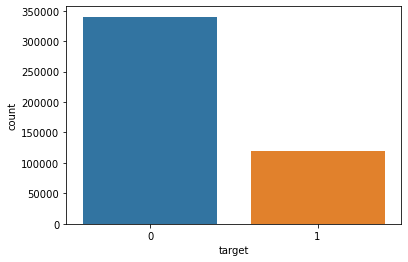

In [14]:
sns.countplot(df['target'])

### Features Categóricas

In [15]:
cat_data = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']

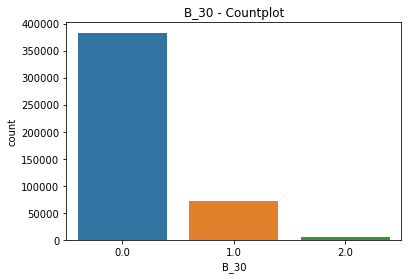

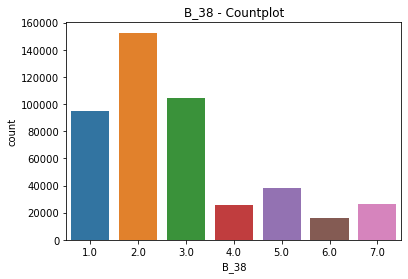

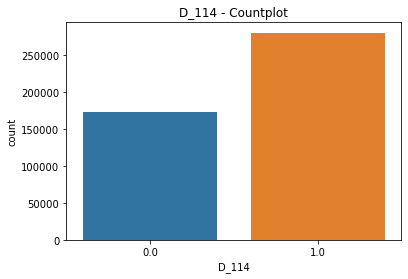

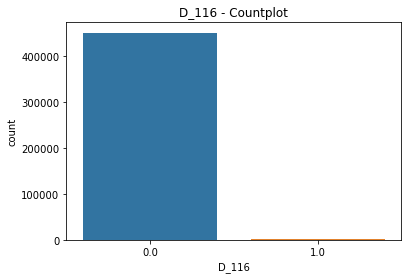

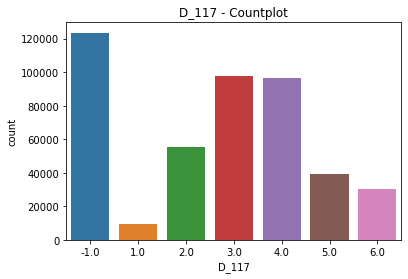

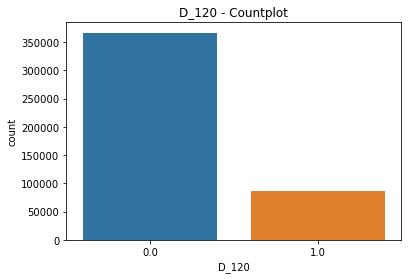

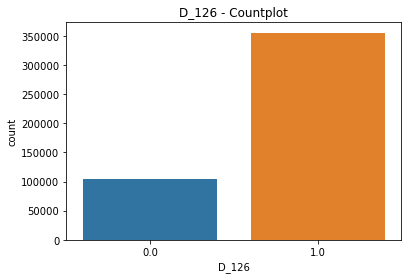

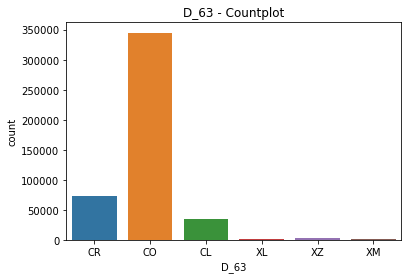

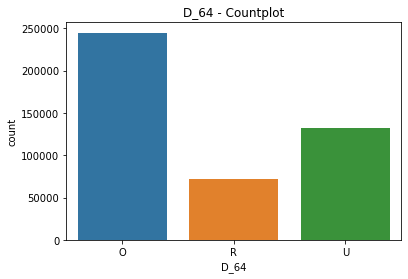

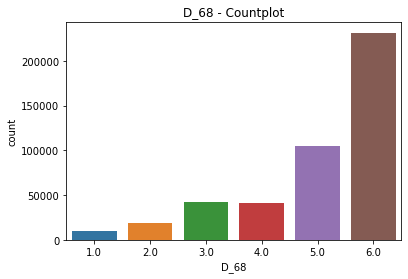

In [16]:
for col in cat_data:
    sns.countplot(df[col])
    plt.title(f'{col} - Countplot')
    plt.show()

### Features Numéricas

##### Teste de Normalidade

In [17]:
p_valor = []

for col in df.drop(['customer_ID', 'target'], axis=1).columns:
    if col not in cat_data:
        array = df[col].values
        string, resultado = normal_test(p_valor, col, array)
        print(string)

Erro feature P_2
Rejeita H0, A feature D_39 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature B_1 NÃO ESTÁ normalmente distribuída
Erro feature B_2
Rejeita H0, A feature R_1 NÃO ESTÁ normalmente distribuída
Erro feature D_41
Erro feature B_3
Erro feature D_44
Rejeita H0, A feature B_4 NÃO ESTÁ normalmente distribuída
Erro feature D_45
Rejeita H0, A feature B_5 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature R_2 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature D_47 NÃO ESTÁ normalmente distribuída
Erro feature D_48
Erro feature B_6
Rejeita H0, A feature B_7 NÃO ESTÁ normalmente distribuída
Erro feature B_8
Rejeita H0, A feature D_51 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature B_9 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature R_3 NÃO ESTÁ normalmente distribuída
Erro feature D_52
Erro feature P_3
Rejeita H0, A feature B_10 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature S_5 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature B_11 NÃO ESTÁ n

##### Correlação

In [18]:
df_corr = df.drop('customer_ID', axis=1).corr()
df_corr

,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,D_45,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
P_2,1.000000,-0.330198,-0.399715,0.598488,-0.555136,-0.418956,-0.496108,-0.598985,-0.478005,0.335602,...,-0.236101,-0.154545,-0.011534,-0.184258,-0.149232,-0.179649,-0.184249,0.008963,-0.164140,-0.667293
D_39,-0.330198,1.000000,0.244894,-0.290344,0.387424,0.645249,0.228637,0.221465,0.229867,-0.021187,...,0.081648,0.057564,-0.001548,0.041735,0.040158,0.041280,0.041654,0.003377,0.032894,0.339477
B_1,-0.399715,0.244894,1.000000,-0.627208,0.280121,0.272819,0.735630,0.347293,0.510477,-0.121502,...,0.158785,0.120095,0.040518,0.106474,0.061251,0.105600,0.106446,0.034230,0.082205,0.449427
B_2,0.598488,-0.290344,-0.627208,1.000000,-0.369797,-0.333443,-0.720642,-0.483311,-0.527048,0.188176,...,-0.222056,-0.161062,-0.024712,-0.159747,-0.106478,-0.157720,-0.159762,-0.035525,-0.129478,-0.557697
R_1,-0.555136,0.387424,0.280121,-0.369797,1.000000,0.425336,0.320428,0.460257,0.356918,-0.142136,...,0.158527,0.108628,0.029386,0.087787,0.082526,0.086550,0.087783,0.001547,0.078479,0.473530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_141,-0.179649,0.041280,0.105600,-0.157720,0.086550,0.063164,0.142327,0.129399,0.097951,-0.146524,...,0.110642,0.073816,0.002244,0.998100,0.338792,1.000000,0.997739,0.586847,0.631687,0.126272
D_143,-0.184249,0.041654,0.106446,-0.159762,0.087783,0.064079,0.143627,0.131048,0.098328,-0.149905,...,0.111187,0.073930,0.002414,0.999602,0.339392,0.997739,1.000000,0.559727,0.645315,0.129257
D_144,0.008963,0.003377,0.034230,-0.035525,0.001547,0.007379,0.040517,0.016411,0.033935,-0.034379,...,0.037162,0.031902,-0.001387,0.560503,-0.040425,0.586847,0.559727,1.000000,0.208629,-0.004368
D_145,-0.164140,0.032894,0.082205,-0.129478,0.078479,0.055328,0.116058,0.113366,0.072609,-0.127853,...,0.077153,0.049678,0.003016,0.645262,0.222345,0.631687,0.645315,0.208629,1.000000,0.117035


In [19]:
df_corr_features = df_corr.drop('target', axis=1)
df_corr_features.drop('target', axis=0, inplace=True)
df_corr_features

,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,D_45,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
P_2,1.000000,-0.330198,-0.399715,0.598488,-0.555136,-0.418956,-0.496108,-0.598985,-0.478005,0.335602,...,-0.233967,-0.236101,-0.154545,-0.011534,-0.184258,-0.149232,-0.179649,-0.184249,0.008963,-0.164140
D_39,-0.330198,1.000000,0.244894,-0.290344,0.387424,0.645249,0.228637,0.221465,0.229867,-0.021187,...,0.075025,0.081648,0.057564,-0.001548,0.041735,0.040158,0.041280,0.041654,0.003377,0.032894
B_1,-0.399715,0.244894,1.000000,-0.627208,0.280121,0.272819,0.735630,0.347293,0.510477,-0.121502,...,0.155909,0.158785,0.120095,0.040518,0.106474,0.061251,0.105600,0.106446,0.034230,0.082205
B_2,0.598488,-0.290344,-0.627208,1.000000,-0.369797,-0.333443,-0.720642,-0.483311,-0.527048,0.188176,...,-0.221736,-0.222056,-0.161062,-0.024712,-0.159747,-0.106478,-0.157720,-0.159762,-0.035525,-0.129478
R_1,-0.555136,0.387424,0.280121,-0.369797,1.000000,0.425336,0.320428,0.460257,0.356918,-0.142136,...,0.149140,0.158527,0.108628,0.029386,0.087787,0.082526,0.086550,0.087783,0.001547,0.078479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_140,-0.149232,0.040158,0.061251,-0.106478,0.082526,0.054480,0.090587,0.107050,0.061210,-0.085582,...,0.056492,0.061521,0.035507,0.004227,0.339699,1.000000,0.338792,0.339392,-0.040425,0.222345
D_141,-0.179649,0.041280,0.105600,-0.157720,0.086550,0.063164,0.142327,0.129399,0.097951,-0.146524,...,0.114445,0.110642,0.073816,0.002244,0.998100,0.338792,1.000000,0.997739,0.586847,0.631687
D_143,-0.184249,0.041654,0.106446,-0.159762,0.087783,0.064079,0.143627,0.131048,0.098328,-0.149905,...,0.114655,0.111187,0.073930,0.002414,0.999602,0.339392,0.997739,1.000000,0.559727,0.645315
D_144,0.008963,0.003377,0.034230,-0.035525,0.001547,0.007379,0.040517,0.016411,0.033935,-0.034379,...,0.043516,0.037162,0.031902,-0.001387,0.560503,-0.040425,0.586847,0.559727,1.000000,0.208629


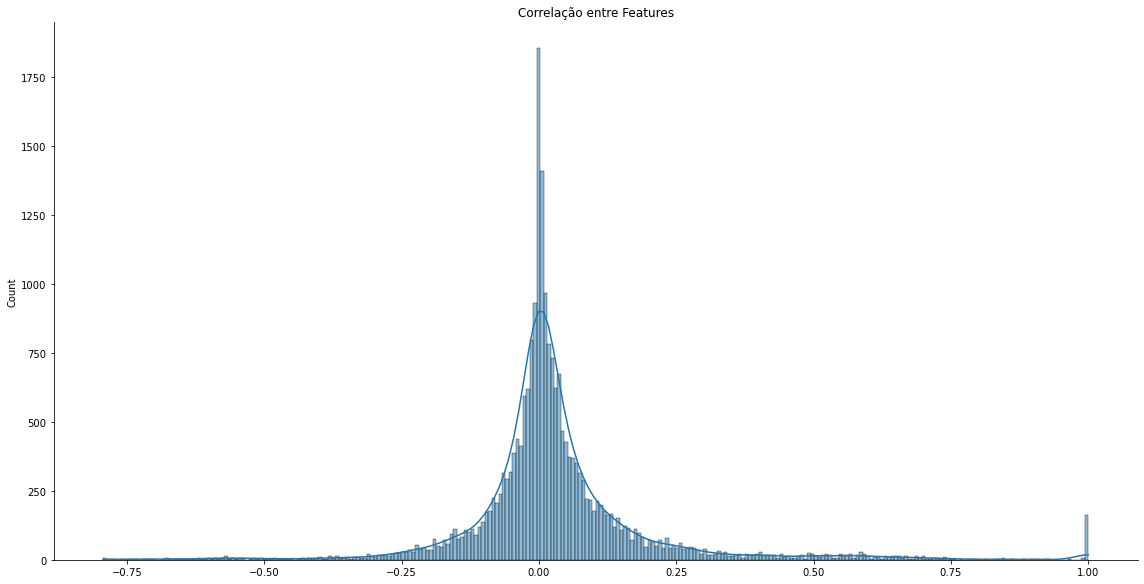

In [20]:
features_corr_array = df_corr_features.values.flatten()
sns.displot(data=features_corr_array, kde=True, height=8, aspect=2)
plt.title('Correlação entre Features')
plt.show()

In [21]:
df_corr_target = df_corr[['target']]
df_corr_target.drop('target', axis=0, inplace=True)
df_corr_target

,target
P_2,-0.667293
D_39,0.339477
B_1,0.449427
B_2,-0.557697
R_1,0.473530
...,...
D_140,0.127404
D_141,0.126272
D_143,0.129257
D_144,-0.004368


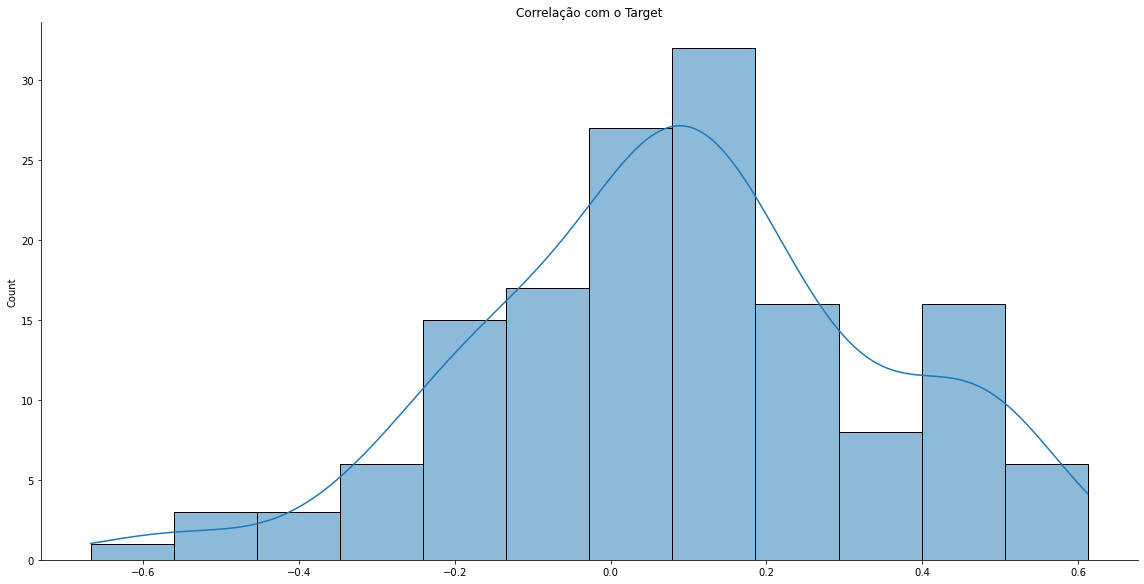

In [22]:
target_corr_array = df_corr_target.values.flatten()
sns.displot(data=target_corr_array, kde=True, height=8, aspect=2)
plt.title('Correlação com o Target')
plt.show()

##### ECDF

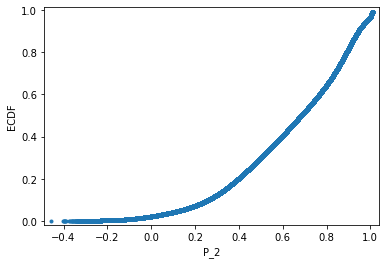

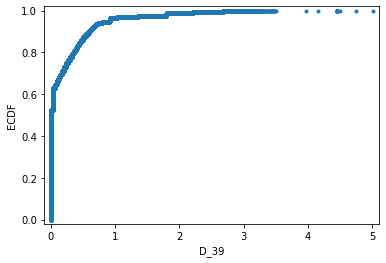

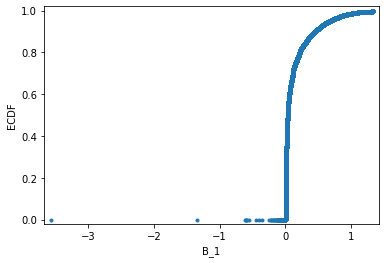

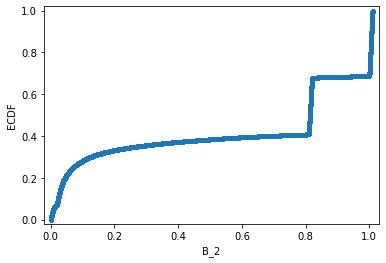

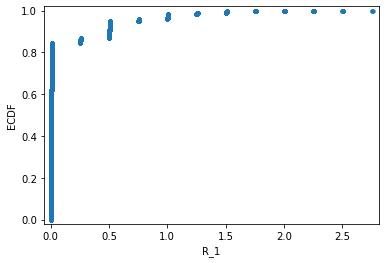

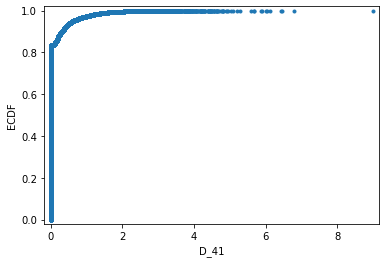

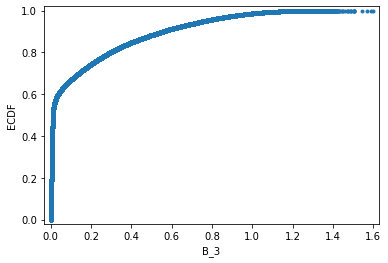

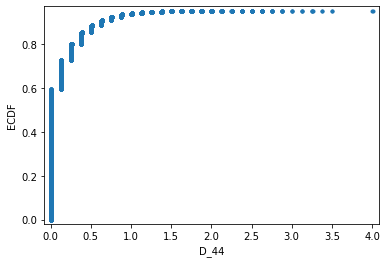

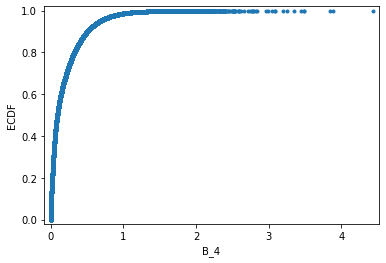

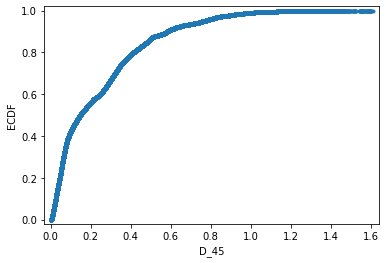

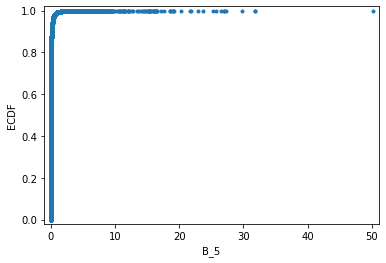

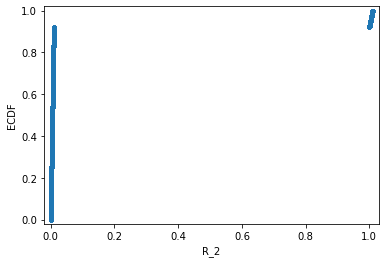

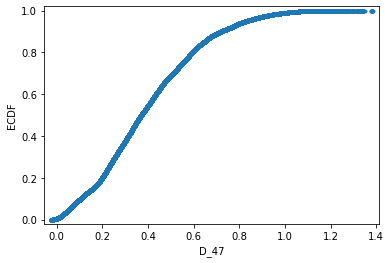

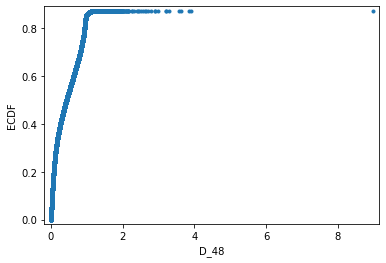

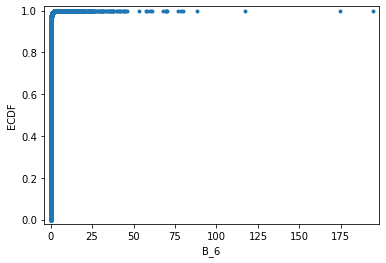

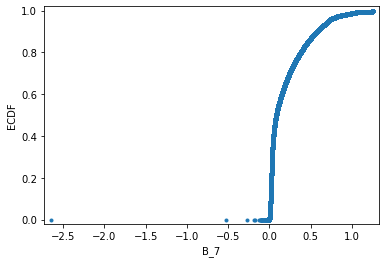

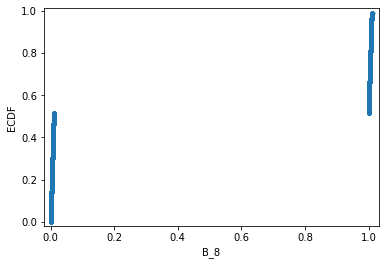

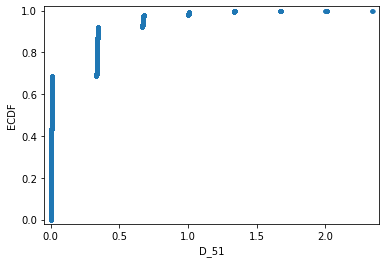

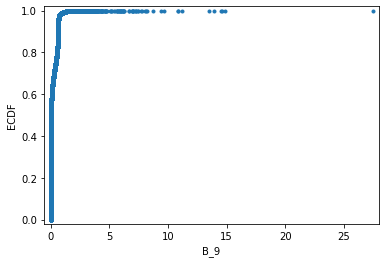

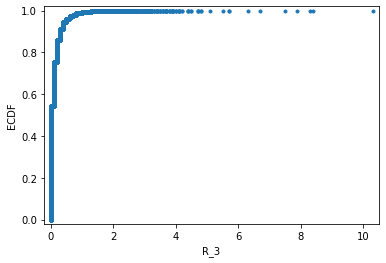

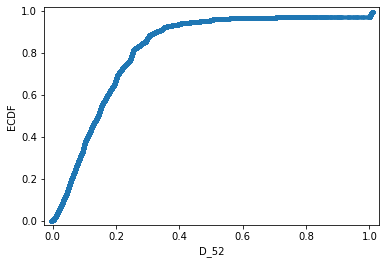

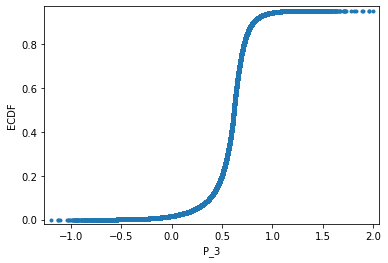

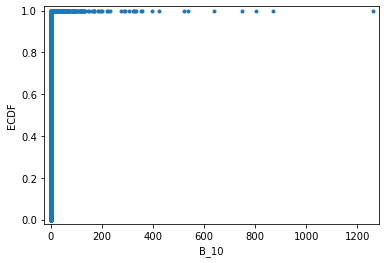

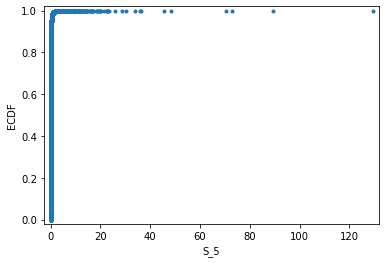

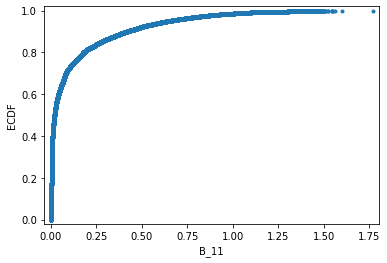

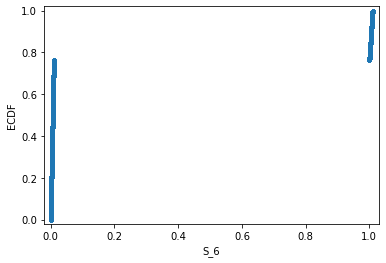

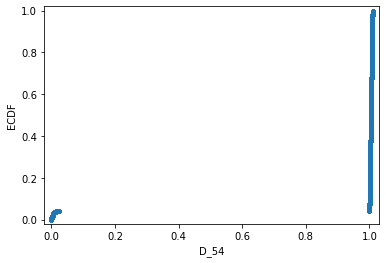

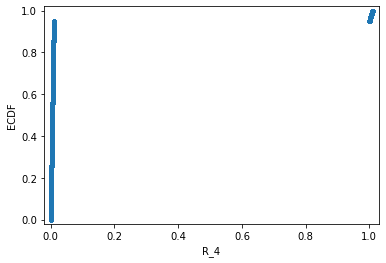

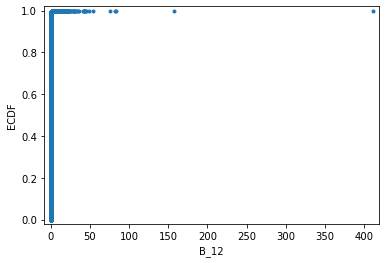

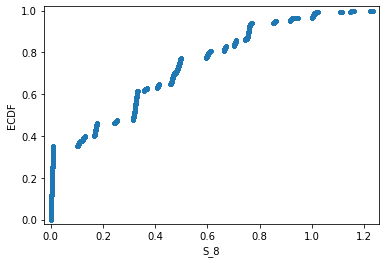

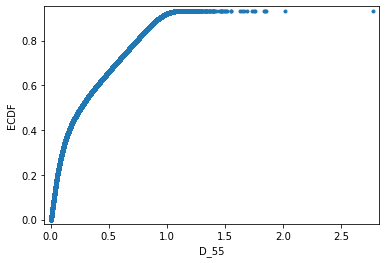

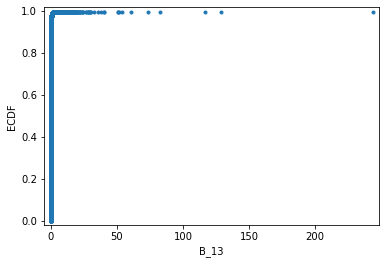

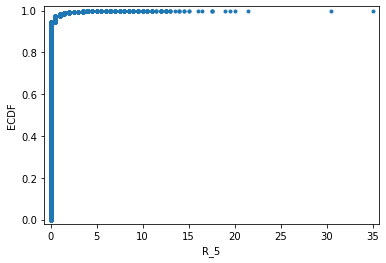

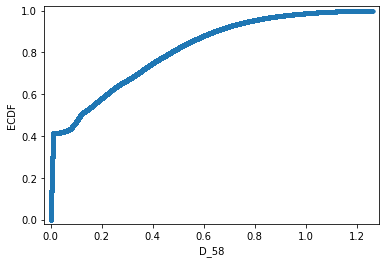

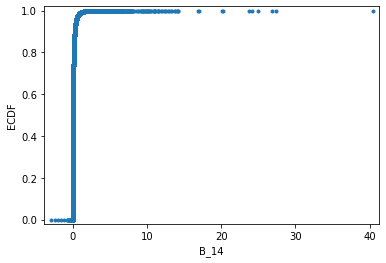

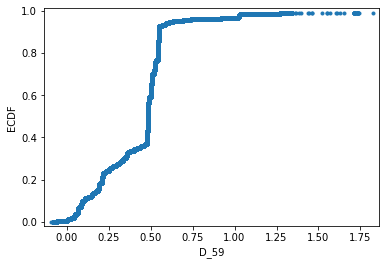

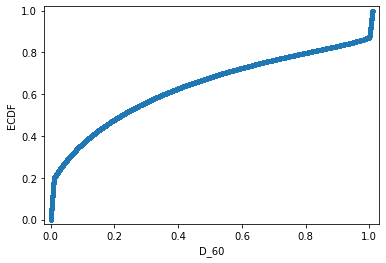

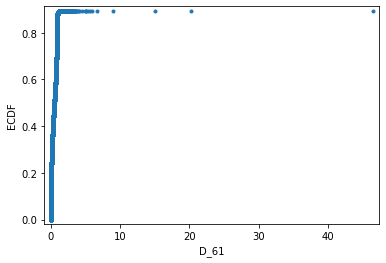

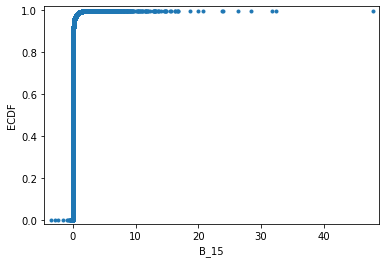

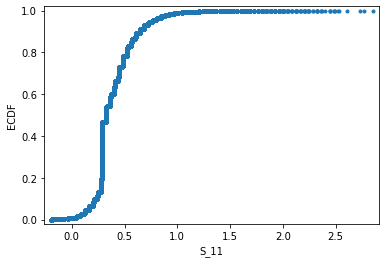

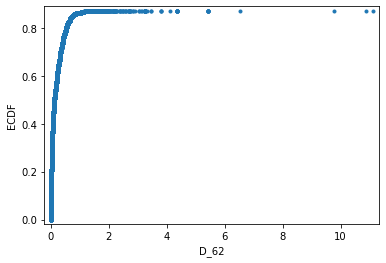

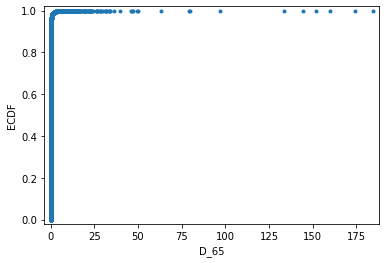

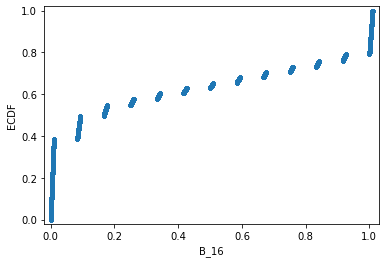

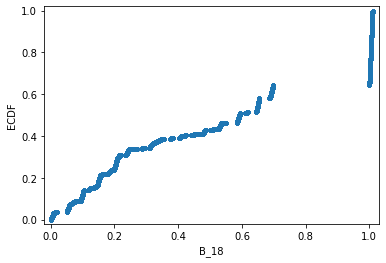

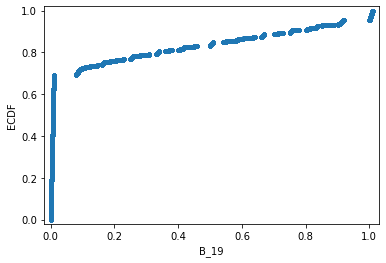

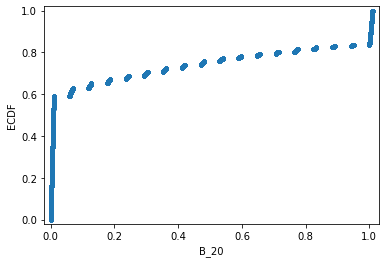

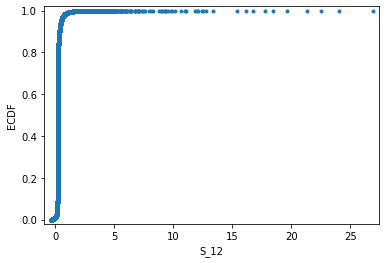

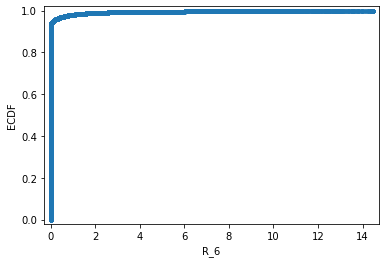

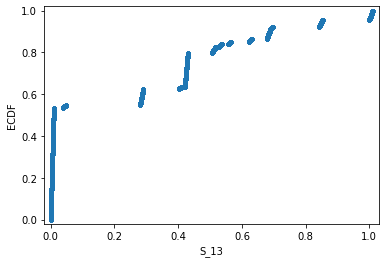

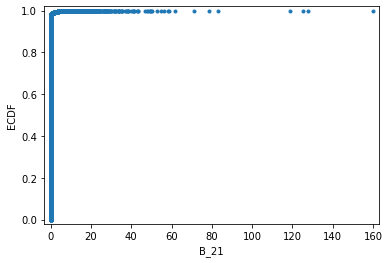

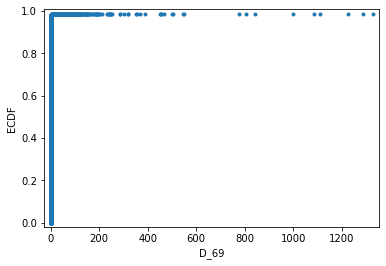

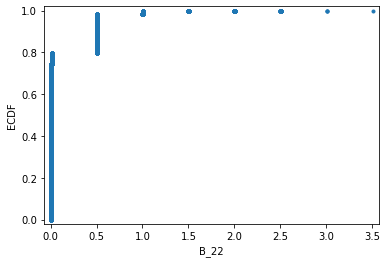

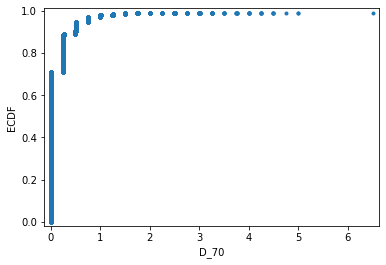

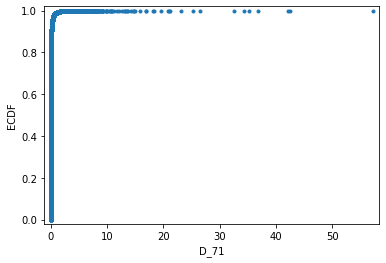

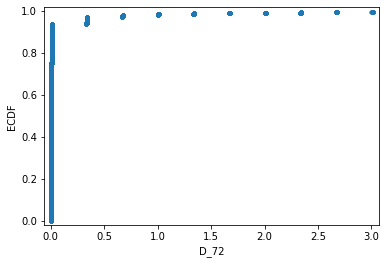

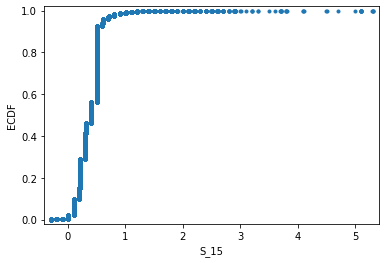

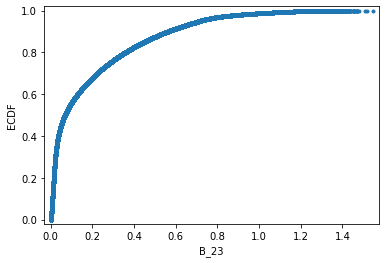

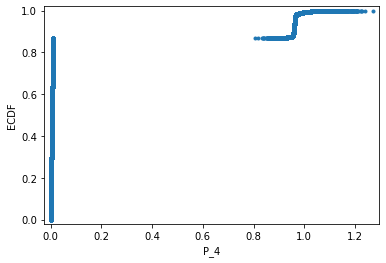

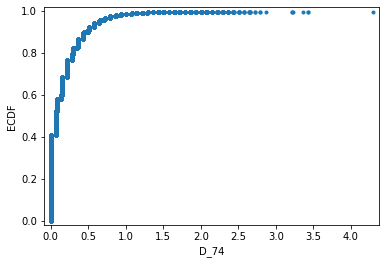

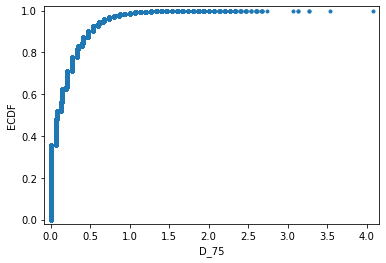

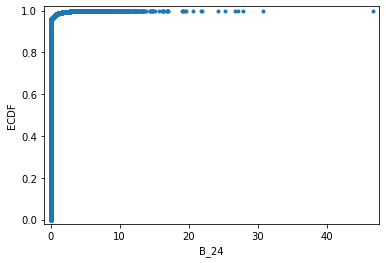

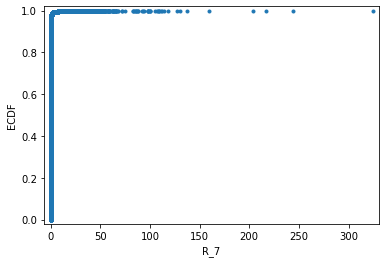

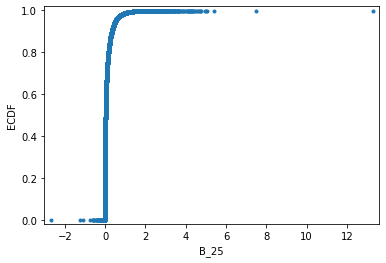

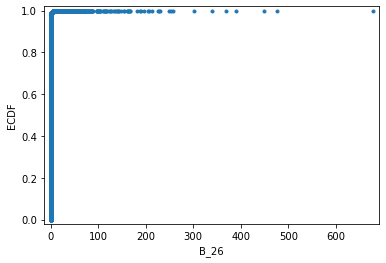

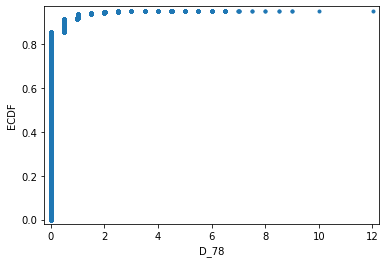

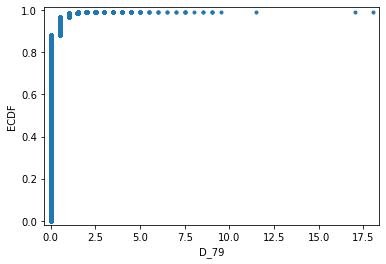

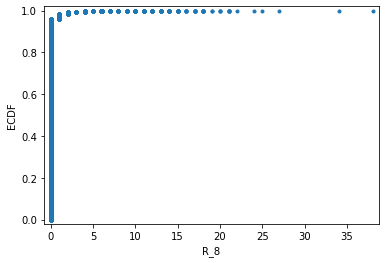

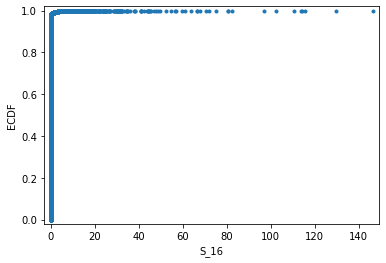

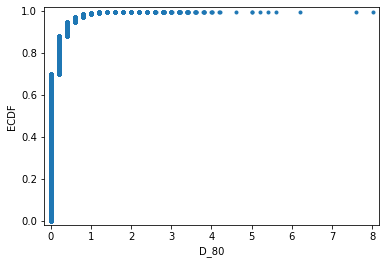

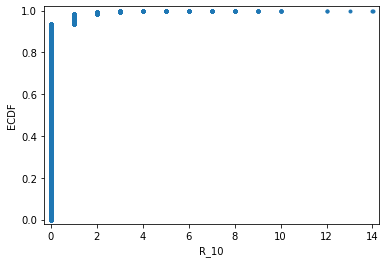

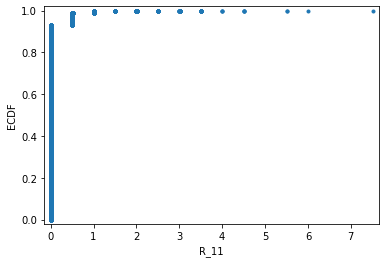

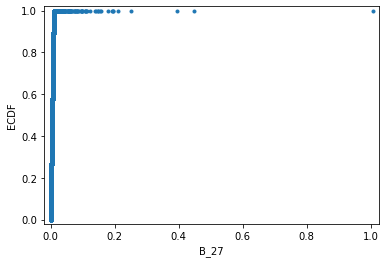

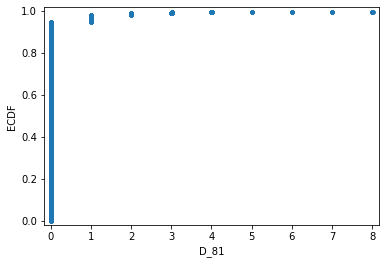

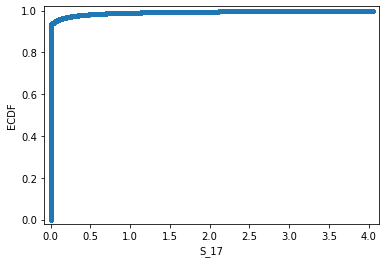

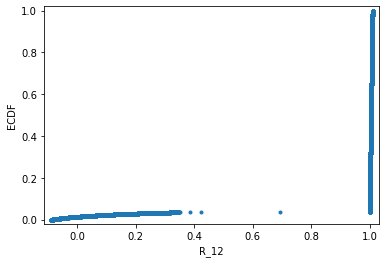

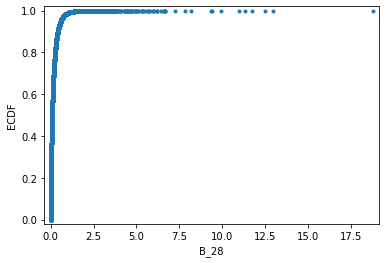

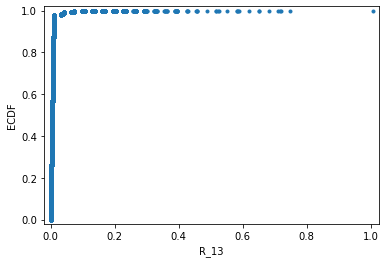

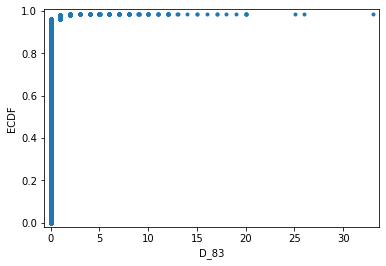

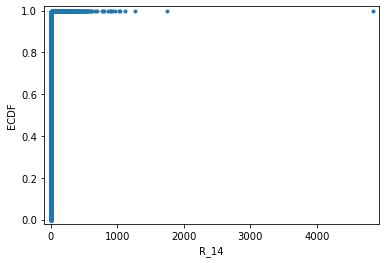

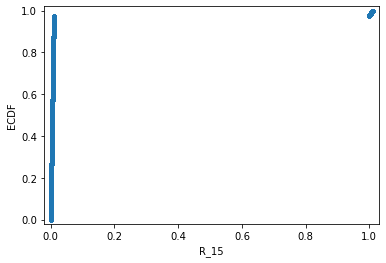

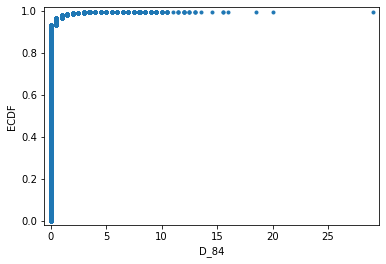

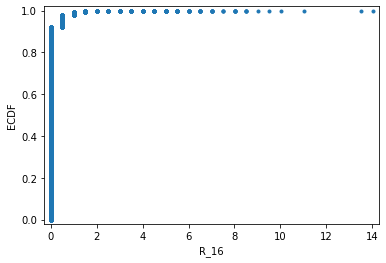

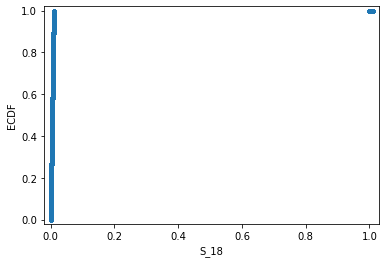

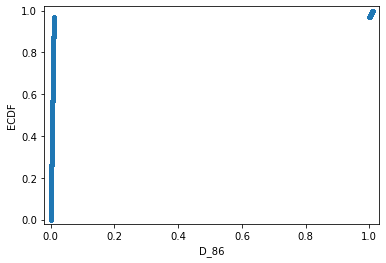

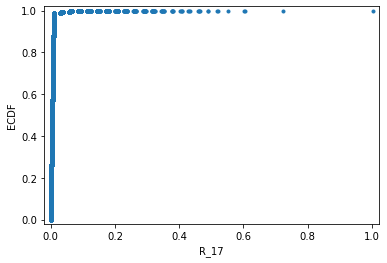

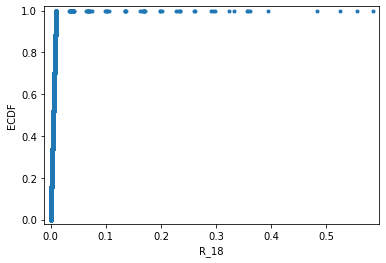

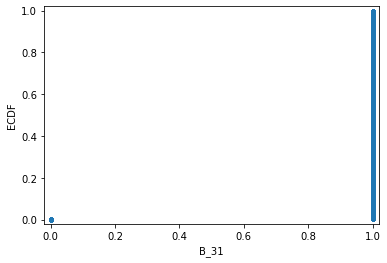

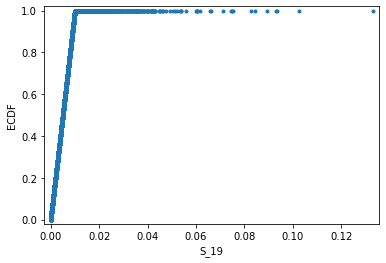

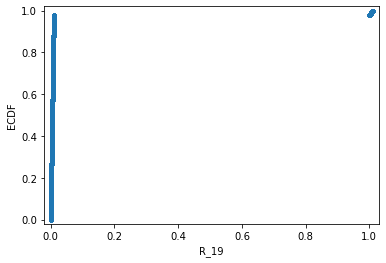

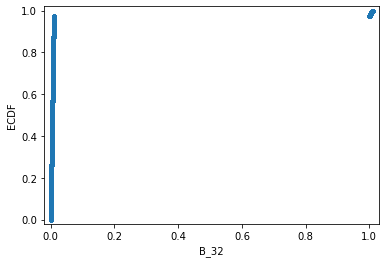

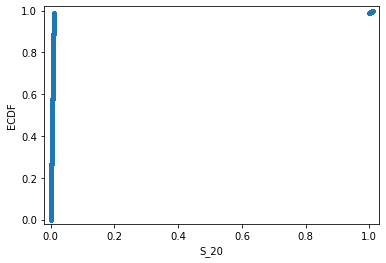

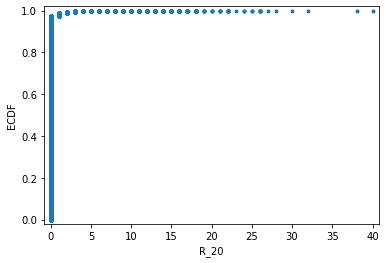

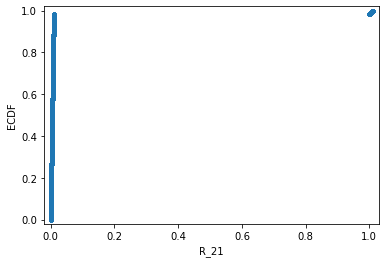

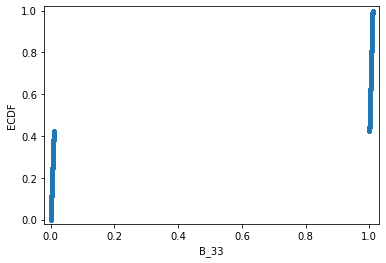

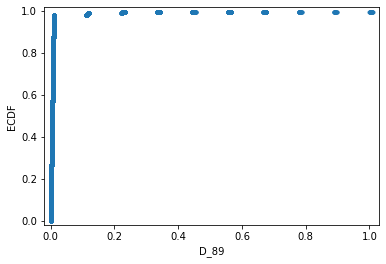

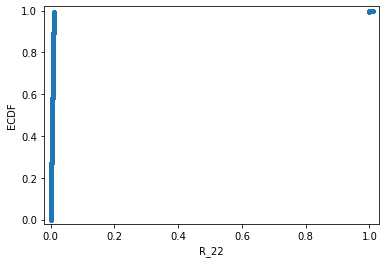

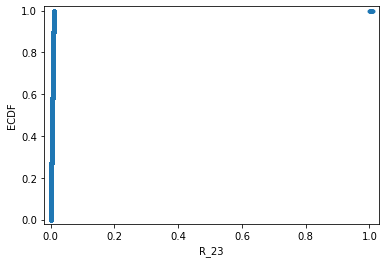

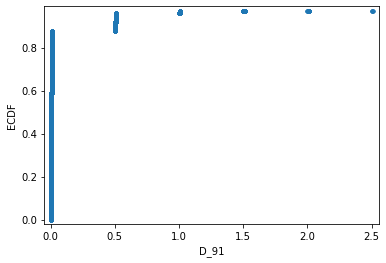

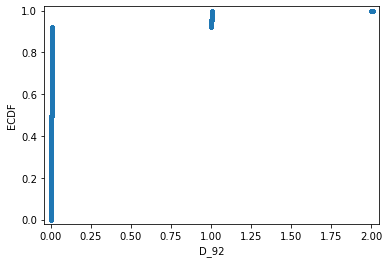

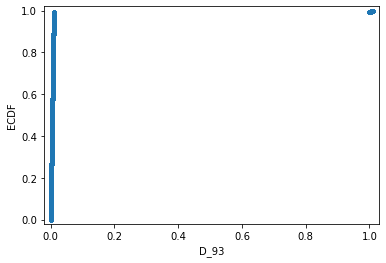

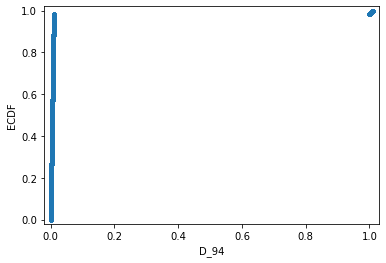

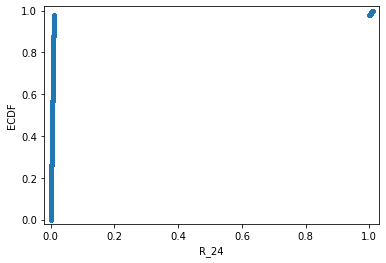

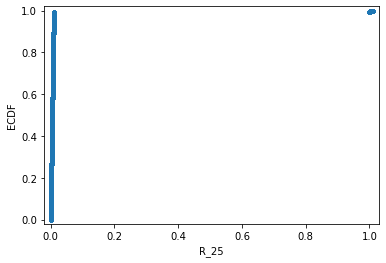

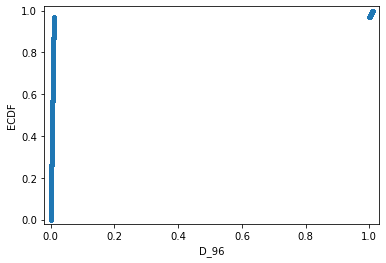

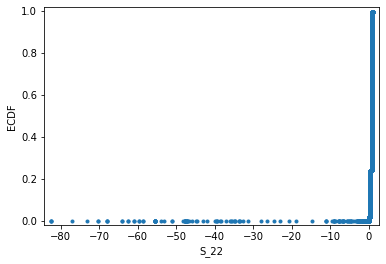

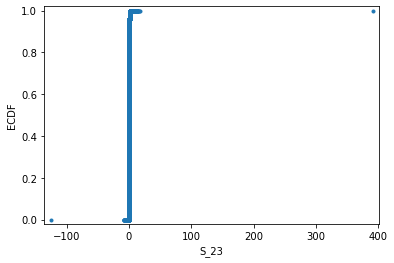

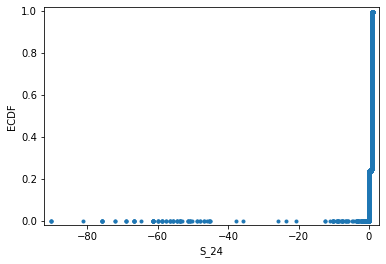

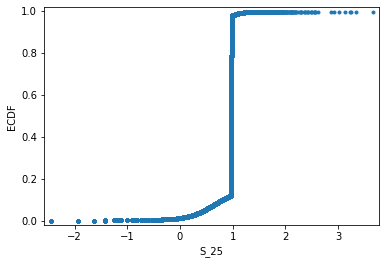

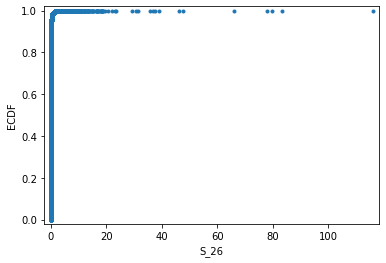

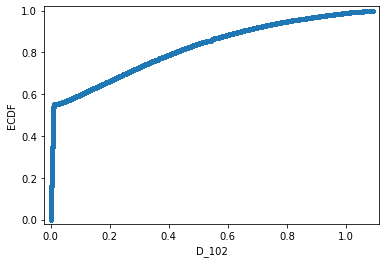

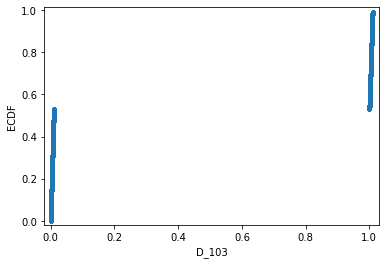

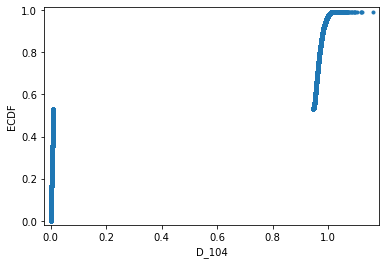

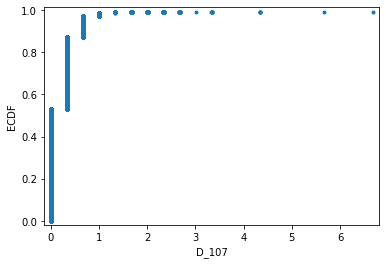

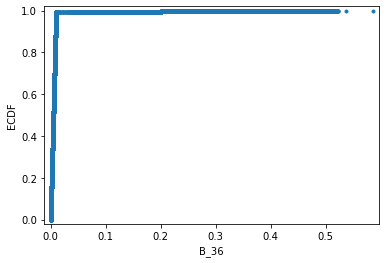

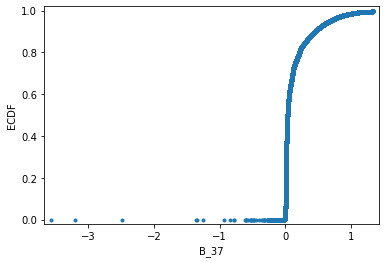

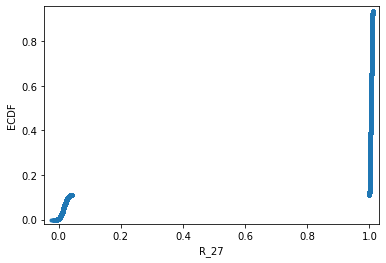

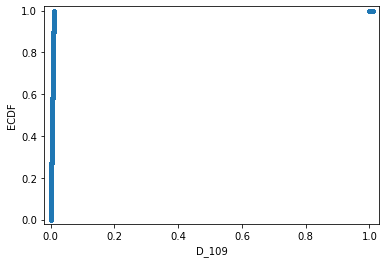

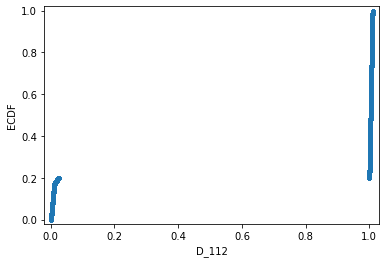

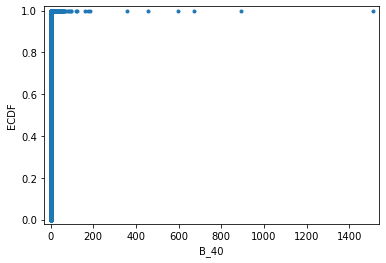

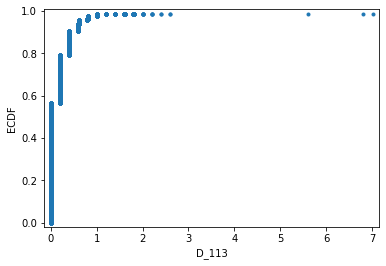

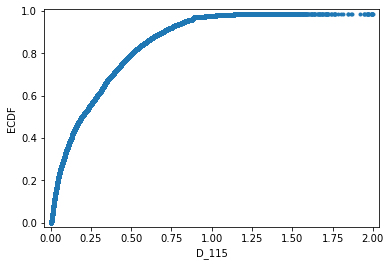

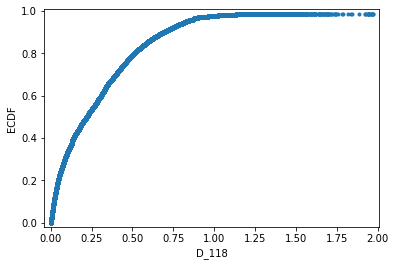

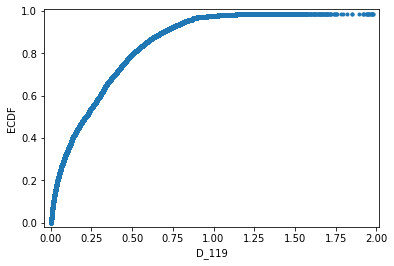

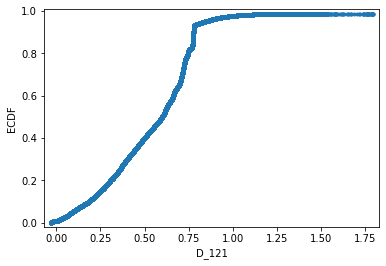

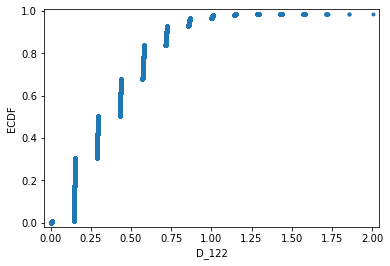

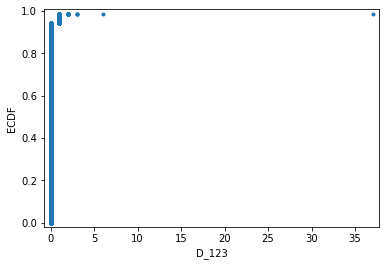

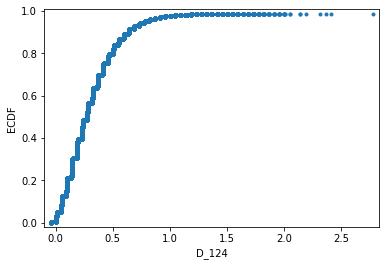

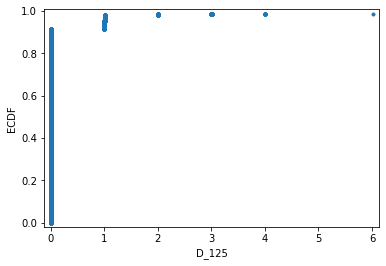

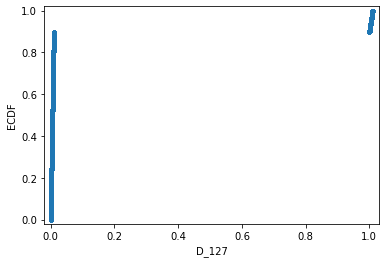

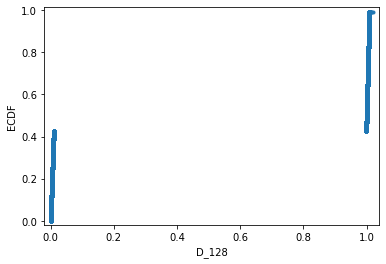

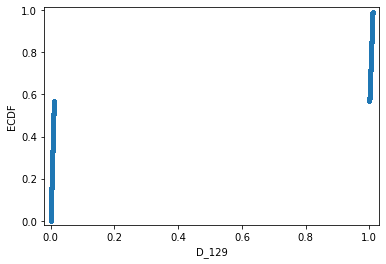

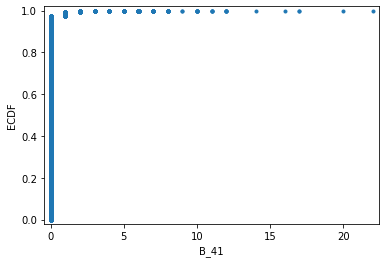

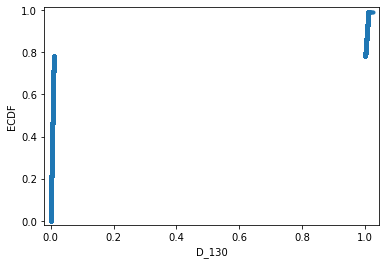

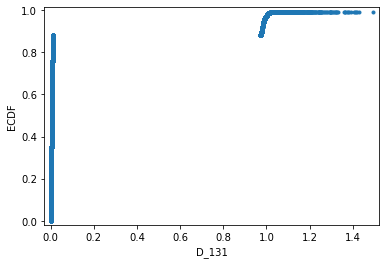

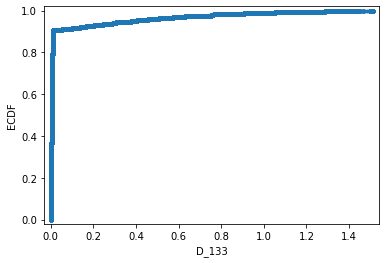

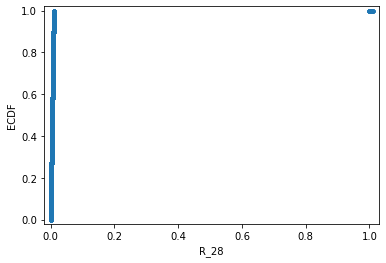

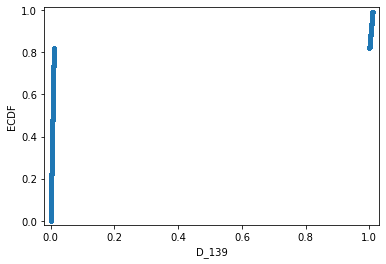

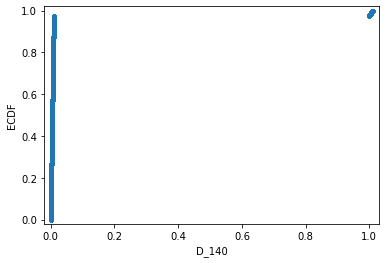

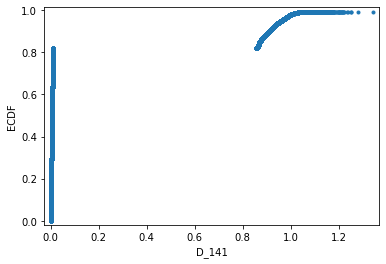

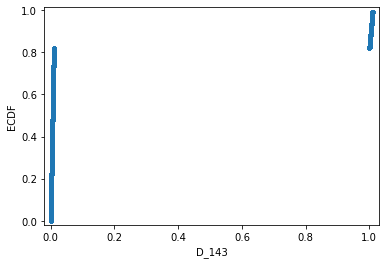

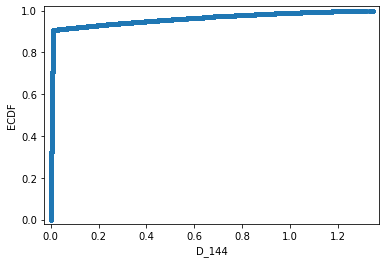

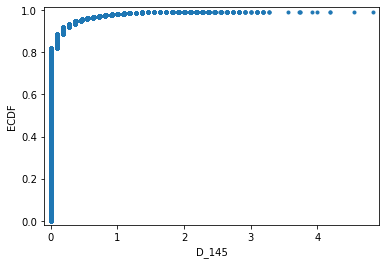

In [23]:
for col in df.drop(['customer_ID', 'target'], axis=1).columns:
    if col not in cat_data:
        x = np.sort(df[col])
        y = np.arange(1, len(x)+1) / len(x)
        plt.plot(x, y, marker='.', linestyle='none')
        plt.xlabel(f'{col}')
        plt.ylabel('ECDF')
        plt.margins(0.02)
        plt.show()

# PCA

In [24]:
pca = PCA(n_components=0.9999999)

In [25]:
X = df.drop(['customer_ID', 'target'], axis=1)
X.drop(cat_data, axis=1, inplace=True)
X.dropna(axis=0, inplace=True)

In [26]:
X_pca = pca.fit_transform(X)

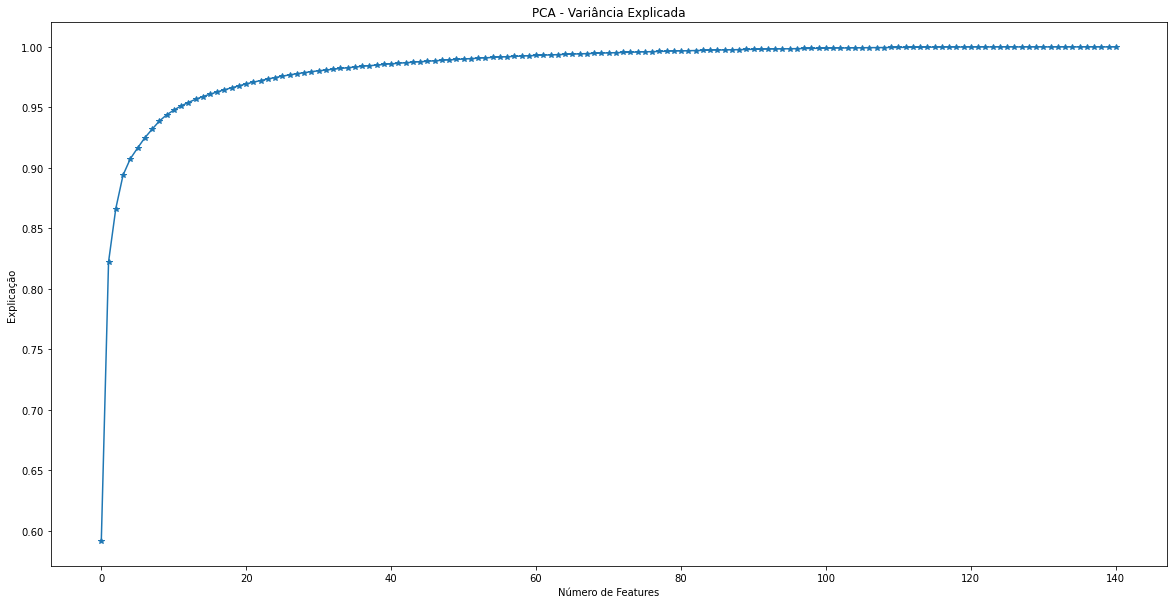

In [27]:
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '*-')
plt.title('PCA - Variância Explicada')
plt.xlabel('Número de Features')
plt.ylabel('Explicação')
plt.show()